In [73]:
# Directory containing the files
dir_path = '15percent'
suff = 'vis'

In [74]:
import os

# Iterate over the files in the directory
# when the filename contains 'SimpleWalk_maj_only_reset_0'
# replace it with 'minwalk'
for filename in os.listdir(dir_path):
    if 'SimpleWalk_maj_only_reset_0' in filename:
        # Construct the new filename
        new_filename = filename.replace('SimpleWalk_maj_only_reset_0', 'minwalk')
        
        # Full path for old and new filenames
        old_file = os.path.join(dir_path, filename)
        new_file = os.path.join(dir_path, new_filename)

        # Rename the file
        os.rename(old_file, new_file)
        print(f'Renamed "{old_file}" to "{new_file}"')


In [75]:
import pandas as pd
import os

def combine_and_clean(directory_path = '15percent', datasetname = 'congress'):
    all_files = os.listdir(directory_path)

    # select only the files that end with given suffix
    selected_files = [f for f in all_files if f.startswith(datasetname) and f.endswith(suffix)]

    # Read each file into a dataframe and store them in a dictionary with file names as keys
    dfs = {f: pd.read_csv(os.path.join(directory_path, f), header=None) for f in selected_files}

    # Concatenate all dataframes into one, using file names as column headers
    combined_df = pd.concat(dfs, axis=1)

    # only keep the first 30 rows
    combined_df = combined_df.iloc[:30]

    # To have only file names as top-level column headers (removing multi-level indexing)
    combined_df.columns = [col[0] for col in combined_df.columns]

    # Create a dictionary to map old column names to new names
    column_mapping = {
        f'{datasetname}.wagner.node2vec.{suff}': 'n2v',
        f'{datasetname}.wagner.nodesim.{suff}': 'nodesim',
        f'{datasetname}.wagner.fairwalk.{suff}': 'fairwalk',
        f'{datasetname}.wagner.crosswalk.{suff}': 'crosswalk',
        f'{datasetname}.wagner.ppr.{suff}': 'ppr',
        f'{datasetname}.wagner.nlocal_fair_ppr.{suff}': 'n-ppr',
        f'{datasetname}.wagner.plocal_fair_ppr.{suff}': 'p-ppr',
        f'{datasetname}.wagner.ulocal_fair_ppr.{suff}': 'u-ppr',
        f'{datasetname}.wagner.minwalk.{suff}': 'minwalk'
    }


    # Filter the DataFrame to keep only the columns listed in the dictionary that exist in the DataFrame
    existing_columns = [col for col in column_mapping.keys() if col in combined_df.columns]
    combined_df_clean = combined_df[existing_columns].copy()

    # Rename the columns as per the mapping
    combined_df_clean.rename(columns=column_mapping, inplace=True)


    # # Filter the DataFrame to keep only the columns listed in the dictionary
    # combined_df_clean = combined_df[list(column_mapping.keys())]

    # # Rename the columns using the dictionary
    # combined_df_clean = combined_df_clean.rename(columns=column_mapping)

    # replace any zeros with mean of the column
    combined_df_clean = combined_df_clean.replace(0, combined_df_clean.mean())

    # Now, combined_df contains the desired columns in the specified order with the new names
    return combined_df_clean

In [78]:
import matplotlib.pyplot as plt

def plot_suff(dataframes, dataset_names, ylabel='Visibility'):
    # Create a 2x3 grid of subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot each dataframe on a separate subplot
    for i, df in enumerate(dataframes):
        row = i // 3
        col = i % 3
        
        for column in df.columns:
            axes[row, col].plot(df.index[5:], df[column][5:], label=column)
        
        # Set custom x-axis label with dataset name in parentheses
        axes[row, col].set_xlabel(f'Iterations ({dataset_names[i]})', fontsize=16)
        axes[row, col].set_ylabel(ylabel, fontsize=14)
        
        # Show legend only in the first chart
        if i == 0:
            axes[row, col].legend(loc='upper right')  # Place the legend inside the first chart
        
        # Remove titles for all charts
        axes[row, col].set_title('')
        
        # Increase font size of tick labels on x and y axes
        axes[row, col].tick_params(axis='both', labelsize=16)
        
        # Set y-axis limits to [0, 1.0]
        axes[row, col].set_ylim([0, 1.0])

    # Adjust spacing between subplots
    plt.tight_layout()

    # Save the figure as a PDF
    plt.savefig(f'plot.{dir_path}.{suff}.pdf', format='pdf')

    # Show the plots
    plt.show()


        n2v   nodesim  fairwalk  crosswalk       ppr     n-ppr     p-ppr  \
0  0.089330  0.089330  0.089330   0.089330  0.089330  0.089330  0.089330   
1  0.086849  0.089330  0.086849   0.295285  0.071960  0.069479  0.084367   
2  0.081886  0.086849  0.086849   0.277916  0.059553  0.059553  0.086849   
3  0.084367  0.086849  0.076923   0.263027  0.057072  0.052109  0.069479   
4  0.074442  0.086849  0.071960   0.263027  0.044665  0.044665  0.076923   

      u-ppr   minwalk  
0  0.089330  0.089330  
1  0.084367  0.533499  
2  0.084367  0.521092  
3  0.086849  0.481390  
4  0.084367  0.491315  


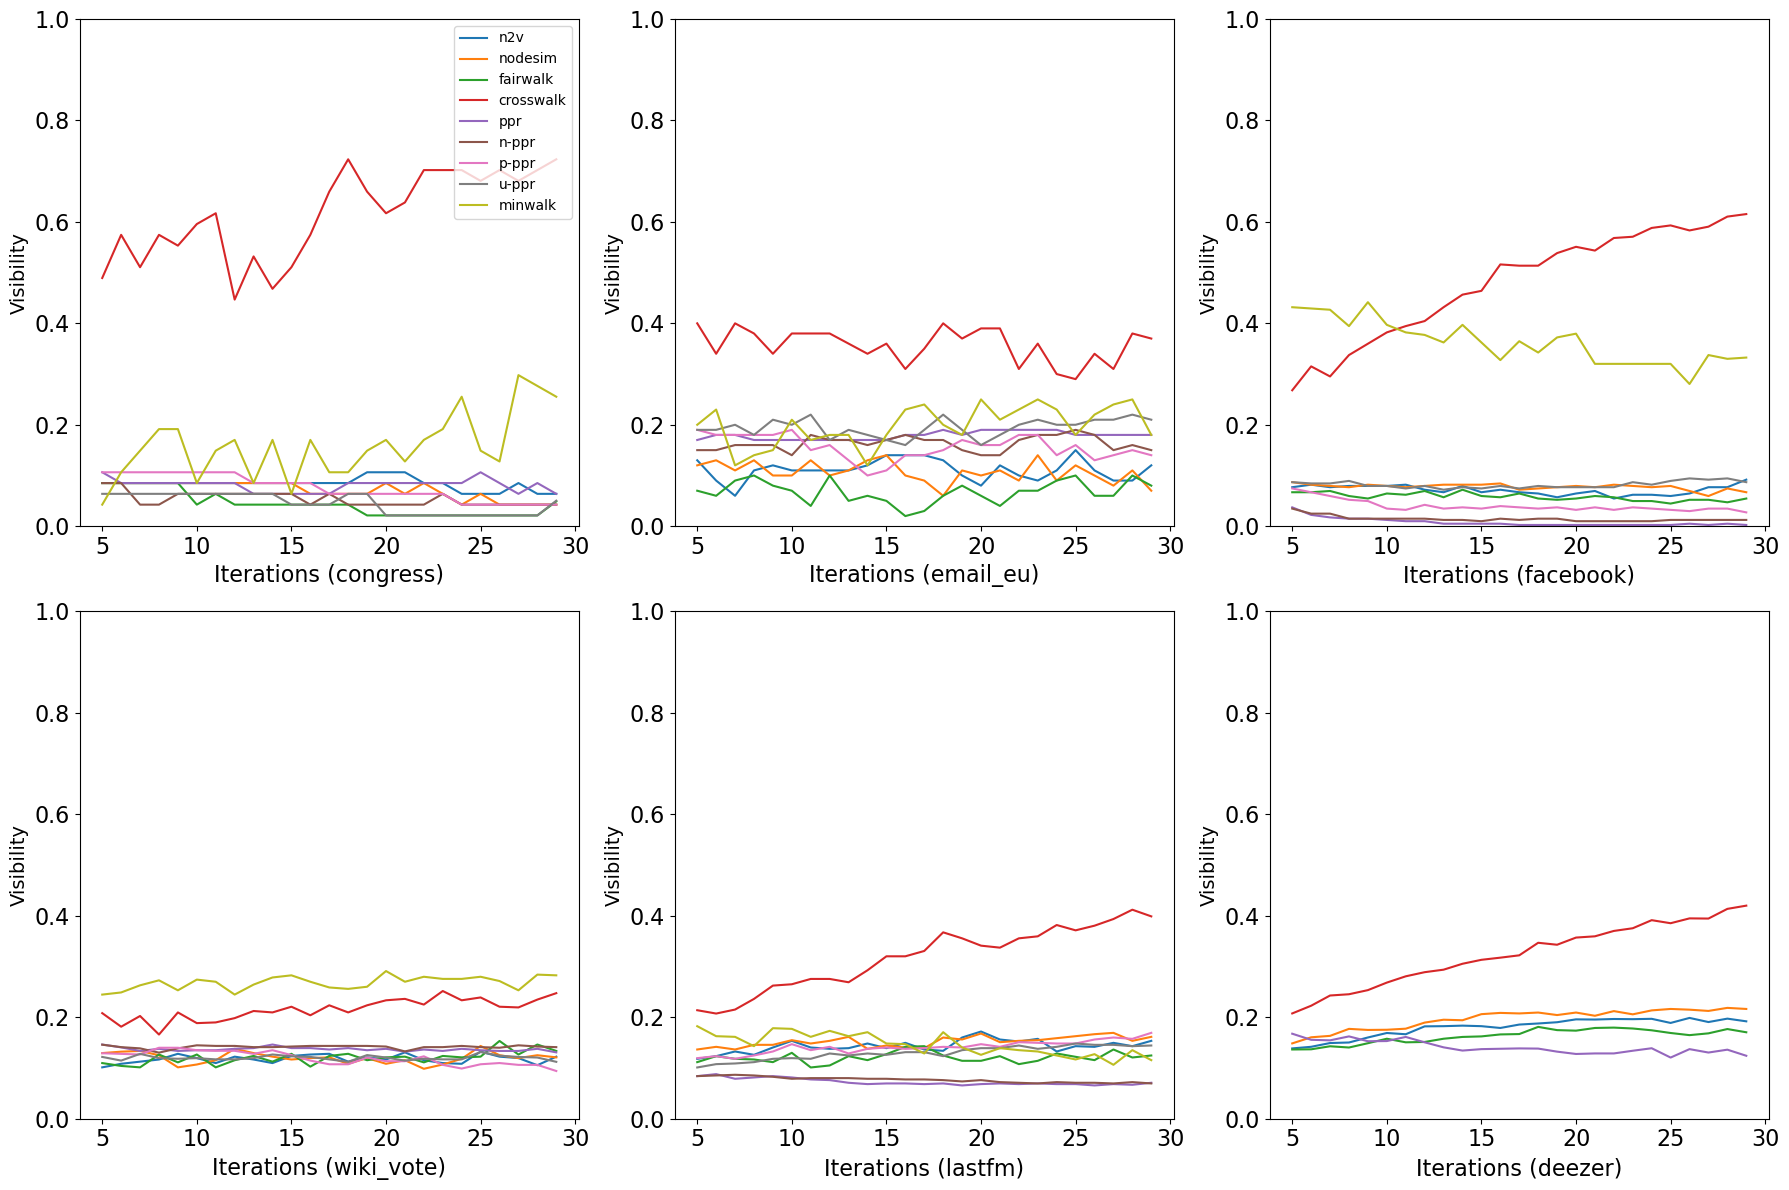

In [77]:
congress_suff = combine_and_clean(directory_path=dir_path, datasetname = 'congress', suffix = suff)
email_eu_suff = combine_and_clean(directory_path=dir_path, datasetname = 'email_eu', suffix = suff)
facebook_suff = combine_and_clean(directory_path=dir_path, datasetname = 'facebook', suffix = suff)
wiki_vote_suff = combine_and_clean(directory_path=dir_path, datasetname = 'wiki_vote', suffix = suff)
lastfm_suff = combine_and_clean(directory_path=dir_path, datasetname = 'lastfm', suffix = suff)
deezer_suff = combine_and_clean(directory_path=dir_path, datasetname = 'deezer', suffix = suff)


dataframes = [congress_suff, email_eu_suff, facebook_suff, 
              wiki_vote_suff, lastfm_suff, deezer_suff]

# Dataset names in order
dataset_names = ['congress', 'email_eu', 'facebook', 'wiki_vote', 'lastfm', 'deezer']

print(facebook_suff.head())

if suff == 'vis':
    plot_suff(dataframes, dataset_names, ylabel='Visibility')

if suff == 'gin':
    plot_suff(dataframes, dataset_names, ylabel='Gini Index')

if suff == 'clu':
    plot_suff(dataframes, dataset_names, ylabel='Cluetering Coefficient')
